In [1]:
import torch
from PIL import Image
from torchvision import transforms
from models import *

In [2]:
input_shape = (3, 256, 256)

In [3]:
G_AB = GeneratorResNet(input_shape, 9)
# 加载 state_dict
state_dict = torch.load('./saved_models/monet2photo/G_AB_190.pth')
state_dict = {k.replace('module.', ''): v for k, v in state_dict.items()}
# Load model
G_AB.load_state_dict(state_dict)
G_AB.eval()  # 设置为评估模式

GeneratorResNet(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResidualBlock(
      (block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
        

In [4]:
# 加载图片
image = Image.open('./data/monet2photo/test/A/00200.jpg')

In [5]:
# 定义转换
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 根据你的模型需要调整大小
    transforms.ToTensor(),  # 将图片转换为张量
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 根据你的模型需要进行归一化
])

In [6]:
# 应用转换
image = transform(image)

In [7]:
# 添加一个批次维度
image = image.unsqueeze(0)

In [8]:
# 确保在正确的设备上
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image = image.to(device)
G_AB = G_AB.to(device)

In [9]:
# 通过模型传递图片
with torch.no_grad():
    output = G_AB(image)

In [10]:
# 将输出转换回图片
output = output.squeeze(0).detach().cpu()
output = output * 0.5 + 0.5  # 反归一化
output_image = transforms.ToPILImage()(output)

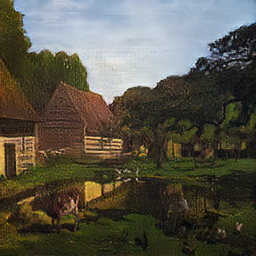

In [11]:
output_image

In [12]:
# 保存图片
# output_image.save('output.jpg')